<a href="https://colab.research.google.com/github/michellepace/seaborn-plot-consistency-guide/blob/main/Seaborn_Consistency_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<dif class="markdown-google-sans">
<font size="6">
<b>The Seaborn Plot That Looked Just Like The Others</b>
</font></div>

<br>

<br>

<div class="markdown-google-sans">
<b>Seaborn Consistency Guide</b>
</div>

---

<div class="markdown-google-sans">
<font size="4">
How to create consistent looking plots in Seaborn with minimal effort. An illustrated demonstration of theme presets and a deep dive into colour. Built with the new seaborn.objects API.
</font>
</div>

<br>

<div class="markdown-google-sans">
  <font size="3">Contents</font>
  <ul>
  <li><a href="#id-overview">Overview</a></li>
  <li><a href="#id-context">Context — size/scale</a></li>
  <li><a href="#id-style">Style — look & feel</a></li>
  <li><a href="#id-font">Font — Family & Scale</a></li>
  <li><a href="#id-colour">Colour — Types, Steps & Gradients</a></li>
  <li><a href="#id-together">All Together</a></li>
  <li><a href="#id-appendix">Appendix</a>
  </li>
  </ul>
</div>

<br><a name="id-overview"></a>
# **Overview**

<div class="markdown-google-sans">
<font size="4">
At the heart of this notebook is Figure 1 below, an illustration of what will be covered. If you were to skip all other explanations, you would still stand a chance of not getting lost. It makes following along easier.
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure01_overview_900px.webp"/>

<div>
<font size="3">
Figure 1: Notebook overview.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Figure 1 shows Seaborn's in-built "quick" preset options. The <a href="https://seaborn.pydata.org/generated/seaborn.objects.Plot.html#configuration" target="_blank">Plot.config.theme.update()</a> method applies these presets to all plots. As an example, the default Style preset is "darkgrid", but you could opt for whitegrid, dark, white, or ticks. Here is the basic syntax:
</font>
</div>

<br>

```python
import seaborn.objects as so
import seaborn as sns
from matplotlib.pyplot import cycler

def set_my_global_theme(
    style: str = "darkgrid",
    context: str = "notebook",
    font_scale: float = 1.0,
    font_family: str = "sans-serif",
    palette: str = "tab10") -> None:

    so.Plot.config.theme.reset()
    
    theme_settings = (
        sns.axes_style(style)
        | sns.plotting_context(context=context, font_scale=font_scale)
        | {
            "font.family": font_family,
            "axes.prop_cycle": cycler("color", sns.color_palette(palette))
          }
    )
    so.Plot.config.theme.update(theme_settings)

# Example usage
set_my_global_theme(style='darkgrid', context='paper', palette='deep')
```

<div>
<font size="3">
Figure 2: Global theme setup with presets.
</font>
</div>


<br>

<div class="markdown-google-sans">
<font size="4">
The rest of this notebook demonstrates the visual impact of each preset, and then a dive into understanding and using colour. Figure 3 below is a high-level view of the <a href="https://seaborn.pydata.org/api.html" target="_blank">seaborn.objects API</a>, also see this <a href="https://seaborn.pydata.org/tutorial/objects_interface.html" target="_blank">tutorial</a>.
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure03_seaborn_object_interface_900px.webp"/>

<div>
<font size="3">
Figure 3: New seaborn.objects API (high-level).
</font>
</div>

<br><a name="id-context"></a>
# **Context — size/scale**

<div class="markdown-google-sans">
<font size="4">
Context presets, as in what context are you presenting in? They adjust the overall scaling of plot elements, including font sizes, line weights, and marker sizes. Available context presets, from smallest to largest scale:

- `paper`: Smallest size, for research papers
- `notebook`: Medium size, ideal for web
- `talk`: Large size, for slide decks
- `poster`: Extra large size
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Demonstration of all Context presets:
</font>
</div>

<br>

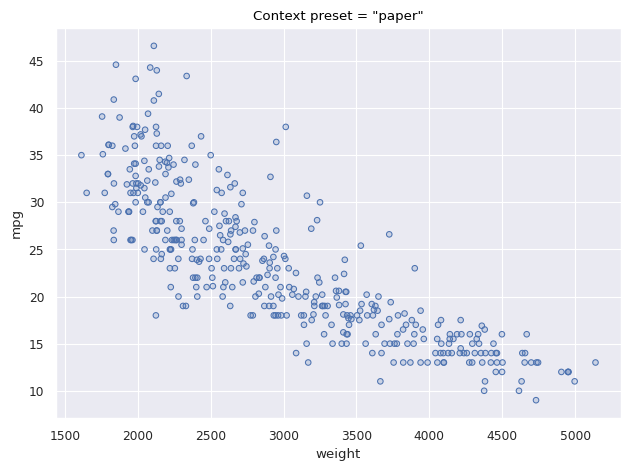

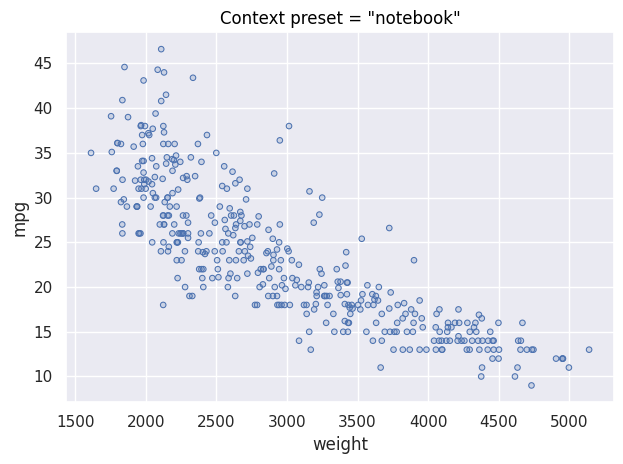

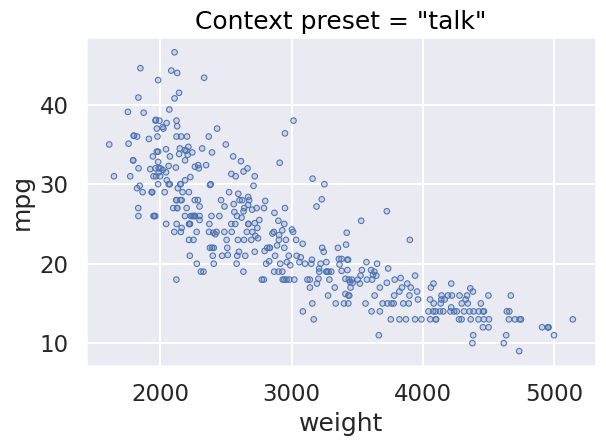

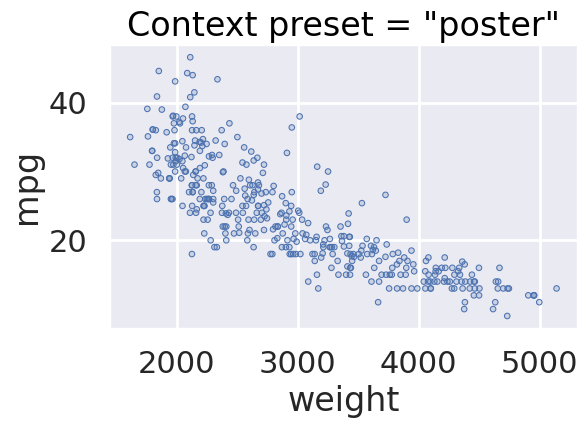

In [1]:
import seaborn.objects as so
import seaborn as sns

mpg_data = sns.load_dataset('mpg')
context_presets = ['paper', 'notebook', 'talk', 'poster']

for context in context_presets:
    # Reset and update theme   for each context preset
    so.Plot.config.theme.reset()
    so.Plot.config.theme.update(sns.plotting_context(context=context))

    theme_test_plot = (
        so.Plot(data=mpg_data, x='weight', y='mpg')
        .add(so.Dots())
        .label(title=f'Context preset = "{context}"')
    )

    theme_test_plot.show()

<br><a name="id-style"></a>
# **Style — look/feel**

<div class="markdown-google-sans">
<font size="4">
Style presets define your plot's background aesthetic. They adjust the visual foundation of your plots, from grid lines to background colours. Available style presets, from most decorative to minimal:

- `darkgrid`: Dark grid with light grid lines
- `whitegrid`: White grid with light grid lines
- `dark`: Dark grid, no grid lines
- `ticks`: Like `white` but with axes marks
- `white`: Minimalist, Edward Tufte style
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Demonstration of all Style presets:
</font>
</div>

<br>

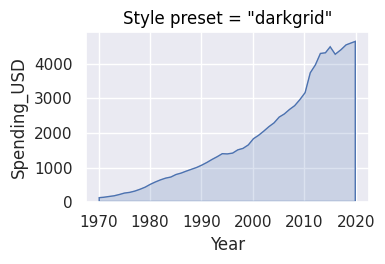

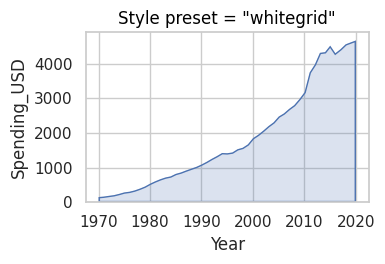

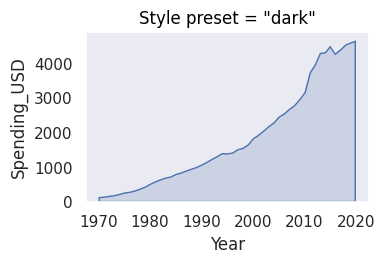

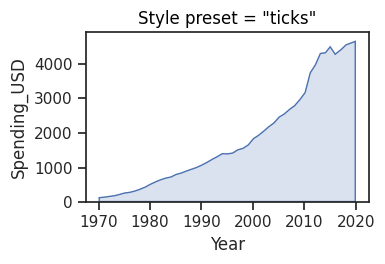

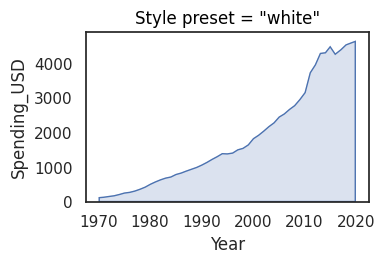

In [2]:
import seaborn.objects as so
import seaborn as sns

health_spend_jap = sns.load_dataset('healthexp').query("Country == 'Japan'")
style_presets = ['darkgrid', 'whitegrid', 'dark', 'ticks', 'white']

for style in style_presets:
    # Reset and update theme for each style preset
    so.Plot.config.theme.reset()
    so.Plot.config.theme.update(sns.axes_style(style))

    theme_test_plot = (
        so.Plot(data=health_spend_jap, x='Year', y='Spending_USD')
        .add(so.Area())
        .layout(size=(4, 2.8))  # plot size w, h
        .label(title=f'Style preset = "{style}"')
    )

    theme_test_plot.show()

<br><a name="id-font"></a>
# **Font — Family & Scale**

<div class="markdown-google-sans">
<font size="4">
Font presets are best set to font families that work on any platform. Dependable font family presets, from clean to Edward Tufte's favourite:

- `Sans-serif`: Clean lines, no embellishments
- `Monospace`: Fixed-width, uniform spacing
- `Serif`: Newspaper-like strokes, reader-friendly
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Font scale adjusts all text elements (titles, labels, legends) by a multiplier. For example, font_scale=2 makes all text twice as large as the default scale (1).
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Demonstration of font and scale:
</font>
</div>

<br>

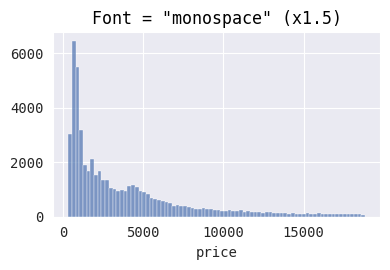

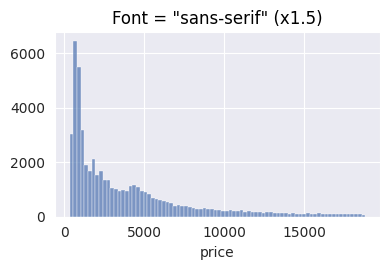

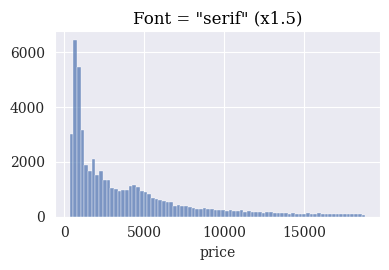

In [3]:
import seaborn.objects as so
import seaborn as sns

diamond_data = sns.load_dataset('diamonds')
font_family_presets = ['monospace', 'sans-serif', 'serif']
f_scale = 1.5

for font_p in font_family_presets:
    # Reset and update theme for each font preset
    so.Plot.config.theme.reset()
    so.Plot.config.theme.update(
        sns.plotting_context(font_scale=f_scale)
        | {"font.family": font_p}
    )

    theme_test_plot = (
        so.Plot(data=diamond_data, x='price')
        .add(
            so.Bars(),  # Visual element (Mark)
            so.Hist()   # Transform data into histogram bins
        )
        .layout(size=(4, 2.8))  # plot (wd, ht)
        .label(title=f'Font = "{font_p}" (x{f_scale})')
    )

    theme_test_plot.show()

<br><a name="id-colour"></a>
# **Colour — Types, Steps & Gradients**

## **_Know The Basics_**

<div class="markdown-google-sans">
<font size="4">
To set a default theme colour palette, you first need to choose one. To know which to choose, you must understand the three palette types first. Take a look at this illustration again:
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure04_overview_colour_900px.webp"/>

<div>
<font size="3">
Figure 4: Palettes are sets of individual colours, and classified into three types.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Figure 4 shows nine palettes, though there are many (see Appendix). A palette is a set of n colours. For instance, the palette in the top-left has 10 colours and is named "tab10", while the palette in the top-centre, "Purples", has 6 colours. These palettes are classified as categorical, sequential, or diverging.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
 It is this classification that really helps choose the right palette for both your data and story. Before reading further, study Figure 5 and to try to spot patterns:
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure05_palette_types_fewer_more_765px.webp"/>

<div>
<font size="3">
Figure 5: Palettes are sets of colours that behave differently depending on type.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Hopefully in Figure 5 you noticed that categorical palettes behave quite differently: these palette types truncate when there are fewer "things" to colour, and repeat when there are more. Whereas the other two palette types will "auto-adjust" and the colours have an "order".
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Now with this understanding, pretend you are trying to select the perfect palette to "colour your bars"; if you need to emphasise:

1. **Categories** (e.g., country) use a **categorical** palette.
1. **How values range** (e.g., population) use a **sequential** palette.
1. **How values range AND diverge** from a value (e.g., population vs average) use a **diverging** palette.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Put another way, Figure 6 below shows what each type is designed to emphasise:
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure06_palette_types_by_design_purpose_400px.webp"/>

<div>
<font size="3">
Figure 6: What each palette type is designed to emphasise.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
But what if you want colours to smoothly transition rather than in binned "steps"? For example, imagine you have a dot plot and you want each dot coloured by temperature. It makes sense for the colours to transition in smooth gradients, as shown in Figure 7:
</font>
</div>

<br>

<img src="https://michellepace.github.io/seaborn-plot-consistency-guide/images/figure07_viridis_in_steps_and_gradients_400px.webp"/>

<div>
<font size="3">
Figure 7: Sequential palette "viridis" in discrete steps and continuous gradients.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Conveniently, Seaborn chooses steps or smooth gradients for you. If you create a plot and colour by, say weekday, then Seaborn will apply "steps". Conversely, if you were to colour by a continuous variable, say temperature, Seaborn will apply "continuous gradients".
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Finally, for continuous gradients always use a sequential or diverging palette. Categorical palette colours have no inherent order, so transitions between them are not meaningful.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
This topic is much easier to grasp when you see it:
</font>
</div>

## _**Setup For Examples**_

<div class="markdown-google-sans">
<font size="4">

Run this to setup the examples which follow:
</font>
</div>

In [4]:
# Used by examples
import seaborn.objects as so
import seaborn as sns
from IPython.display import display # E.g 4 only

# Used in setup only
import matplotlib.pyplot as mpl
import numpy as np

# Constants
THEME_PALETTE = 'Accent'
PALETTE_CAT =  'dark'
PALETTE_CAT2 = 'Set1'
PALETTE_SEQ = 'viridis_r'

# Datasets
penguins_df = sns.load_dataset('penguins')
diamonds_df = sns.load_dataset('diamonds')


# Helpers
def show_palette(palette_name: str, msg: str = '', as_cmap: bool = False) -> None:
    """Display a color palette.
    Args:
        palette_name: Name of a colour palette
        msg: Optional prefix message for the title
        as_cmap: Whether to display as continuous colormap
    """
    # Setup
    title = f'{msg + " " if msg else ""}Palette — {palette_name}'

    # Get palette
    try:
        colors = sns.color_palette(palette_name, as_cmap=as_cmap)
    except (ValueError, KeyError):
        print(f"Error: '{palette_name}' is not a valid palette name\n")
        return

    # Plot
    mpl.figure(figsize=(4, .4))
    try:
        mpl.imshow(
            [colors] if not as_cmap else
            np.linspace(0, 1, 256, endpoint=True).reshape(1, -1),
            aspect='auto',
            cmap=colors if as_cmap else None
        )
        mpl.axis('off')
        mpl.title(title, pad=8, loc='left', fontsize=10)
        mpl.show()
    except Exception as e:
        print(f"Error displaying palette: {str(e)}\n")
        mpl.close()
    finally:
        print()


print("Setup for examples — complete!")

Setup for examples — complete!


## _**Eg.1) Theme Palette**_

<div class="markdown-google-sans">
<font size="4">
Setting a default palette in the theme will only apply when colouring by a categorical variable (e.g., country, sex, weekday) and not when colouring by continuous variable (e.g., count, length, temperature). The below example demonstrates this.
</font>
</div>

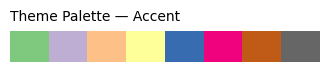

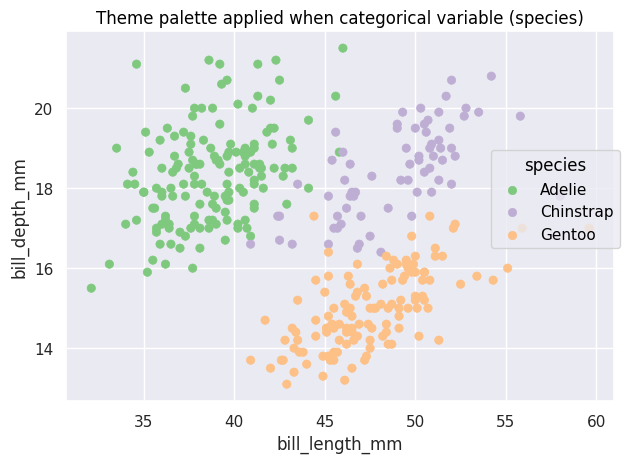

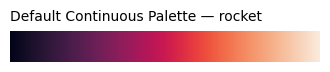

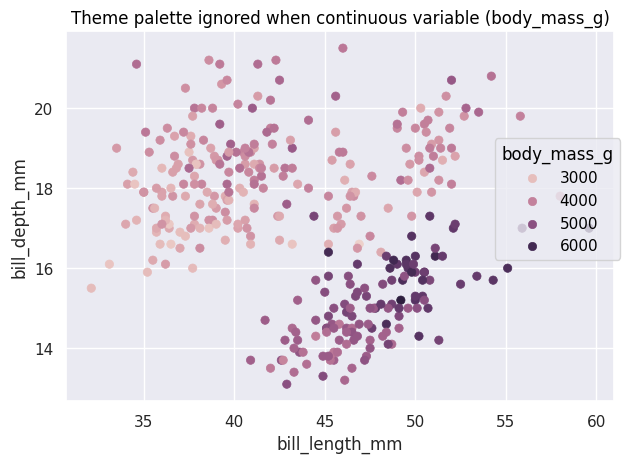

In [5]:
# Theme configuration
so.Plot.config.theme.reset()
so.Plot.config.theme.update(
    {'axes.prop_cycle': mpl.cycler('color', sns.color_palette(THEME_PALETTE))}
)

# Plot1
theme_test_plot1 = (
    so.Plot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', color='species')
    .add(so.Dot())
    .label(title=f'Theme palette applied when categorical variable (species)')
)

# Plot2
theme_test_plot2 = (
    so.Plot(data=penguins_df, x='bill_length_mm', y='bill_depth_mm', color='body_mass_g')
    .add(so.Dot())
    .label(title=f"Theme palette ignored when continuous variable (body_mass_g)")
)

# Usage
show_palette(THEME_PALETTE, 'Theme')
theme_test_plot1.show()
print()
show_palette('rocket', 'Default Continuous', as_cmap=True)
theme_test_plot2.show()

## _**Eg.2) Categorical**_

<div class="markdown-google-sans">
<font size="4">
<b>Colouring by Categorical Variable</b>

When colouring by a categorical variable, Seaborn will automatically apply a palette that has "steps" as apposed to gradients. It will use the theme palette else the Seaborn default (tab10). You can also set the palette in the plot itself, as in the example:
</font>
</div>

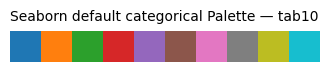

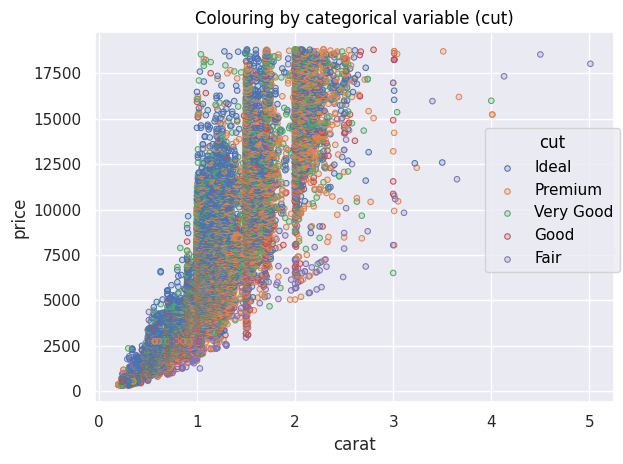

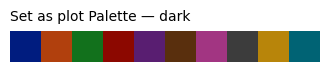

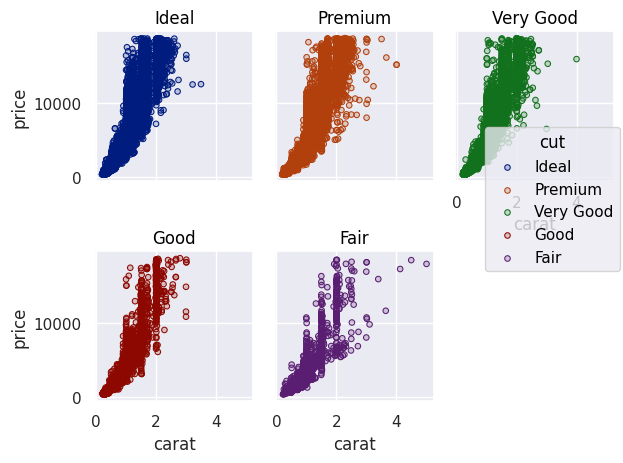

In [6]:
# Reset theme back to defaults
so.Plot.config.theme.reset()

# Define the base plot (for easy re-use)
base_plot = so.Plot(diamonds_df, x='carat', y='price', color='cut')

# Plot 1
plot_categorical = (base_plot # See base_plot, colouring is on 'cut'
    .add(so.Dots())
    .label(title=f'Colouring by categorical variable (cut)')
)

# Plot 2: Facet on 'cut'
plot_category_as_facet = (base_plot
    .add(so.Dots())
    .scale(color=PALETTE_CAT)
    .facet("cut", wrap=3)
)

# Usage:

show_palette("tab10", 'Seaborn default categorical')
plot_categorical.show()
print()

show_palette(PALETTE_CAT, 'Set as plot')
plot_category_as_facet.show()

## _**Eg.3) Continuous**_

<div class="markdown-google-sans">
<font size="4">
<b>Colouring by Continuous Variables</b>
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
When colouring by continuous variables, Seaborn uses the 'rocket' sequential palette by default. Sequential or diverging palettes work best, though categorical palettes will bin the data into discrete colours. Theme palettes won't apply to continuous variables.
</font>
</div>

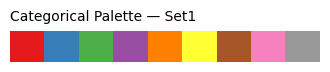

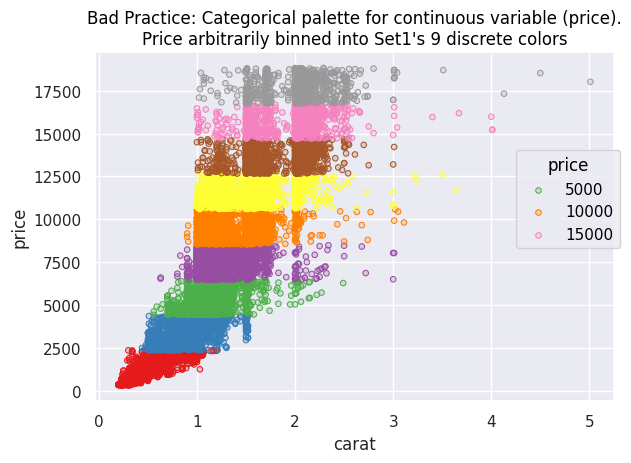

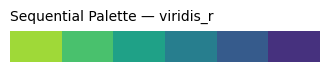

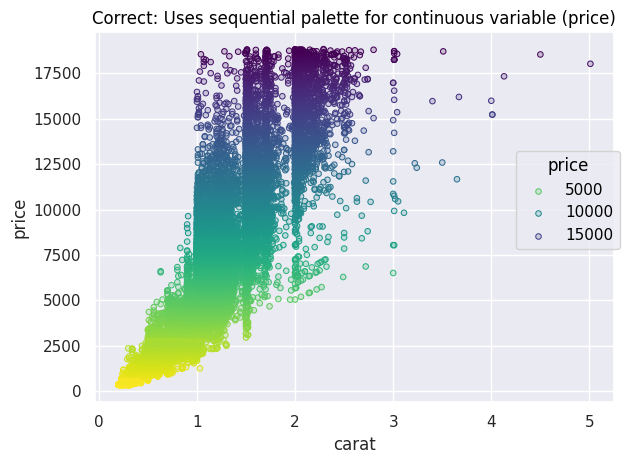

In [7]:
# Reset theme back to defaults
so.Plot.config.theme.reset()

# Define the base plot
base_plot = so.Plot(diamonds_df, x='carat', y='price', color='price')

# Plot 1: Bad practice
plot_incorrect = (base_plot
    .add(so.Dots())
    .scale(color=so.Continuous(PALETTE_CAT2)) # force categorical palette on continuous variable
    .label(
        title=f'Bad Practice: Categorical palette for continuous variable (price).\n'
        f"Price arbitrarily binned into {PALETTE_CAT2}'s 9 discrete colors"
    )
)

# Plot 2: Good practice
plot_correct = (base_plot
    .add(so.Dots())
    .scale(color=PALETTE_SEQ)
    .label(title=f'Correct: Uses sequential palette for continuous variable (price)')
)

# Usage:
show_palette(PALETTE_CAT2, 'Categorical')
plot_incorrect.show()
print()

show_palette(PALETTE_SEQ, 'Sequential')
plot_correct.show()

## _**Eg.4) Enhance**_

<div class="markdown-google-sans">
<font size="4">

Visual tweaks to the plot directly above.
</font>
</div>

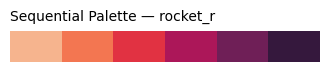

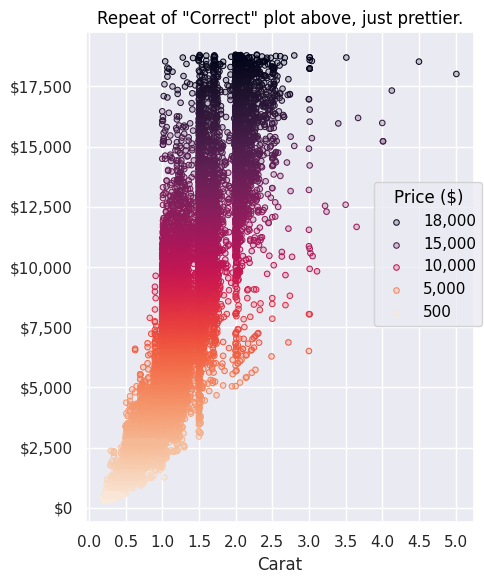

In [8]:
palette = 'rocket_r'

plot_correct_pretty = (
    so.Plot(diamonds_df, x='carat', y='price', color='price')
    .add(so.Dots())
    .scale(
        color=so.Continuous(palette).tick(at=[18000, 15000, 10000, 5000, 500]).label(like="{x:,.0f}"),
        x=so.Continuous().tick(every=0.5),
        y=so.Continuous().label(like="${x:,.0f}")
    )
    .label(
        title='Repeat of "Correct" plot above, just prettier.',
        x="Carat", y="",
        color="Price ($)"
    )
    .layout(size=(5,6))
)

# Usage:
show_palette(palette, 'Sequential')
plot_correct_pretty.show()

<br><a name="id-together"></a>
# **All Together**

<div class="markdown-google-sans">
<font size="4">
Here I bring all presets and colour together into one global theme.
</font>
</div>

## _**Setup The Theme**_

In [9]:
import seaborn.objects as so
import seaborn as sns
from matplotlib.pyplot import cycler
from IPython.display import display


def set_my_global_theme(
    style: str = 'darkgrid',
    context: str = 'notebook',
    font_scale: float = 1.0,
    font_family: str = 'sans-serif',
    palette: str = 'tab10',
    figsize: tuple[float, float] | None = None,
) -> None:
    """Set global theme for seaborn objects interface plots.

    Args:
        style: Seaborn style ('white', 'dark', 'whitegrid', etc.)
        context: Plot context ('paper', 'notebook', 'talk', 'poster')
        font_scale: Font scale factor
        font_family: Font family ('serif', 'sans-serif', 'monospace', etc.)
        palette: Color palette name for categorical variables
        figsize: (wd, ht), defaults to Seaborn size if unspecified
    """
    so.Plot.config.theme.reset()  # start clean

    theme_settings = (
        sns.axes_style(style)
        | sns.plotting_context(context=context, font_scale=font_scale)
        | {
            "font.family": font_family,
            "axes.prop_cycle": cycler("color", sns.color_palette(palette)),
          }
    )

    if figsize is not None:
        theme_settings["figure.figsize"] = figsize

    so.Plot.config.theme.update(theme_settings)


print('Theme setup — complete.')

Theme setup — complete.


## _**See it in Action**_

<div class="markdown-google-sans">
<font size="4">
Three plots to demonstrate the set theme.
</font>
</div>

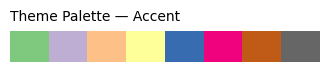

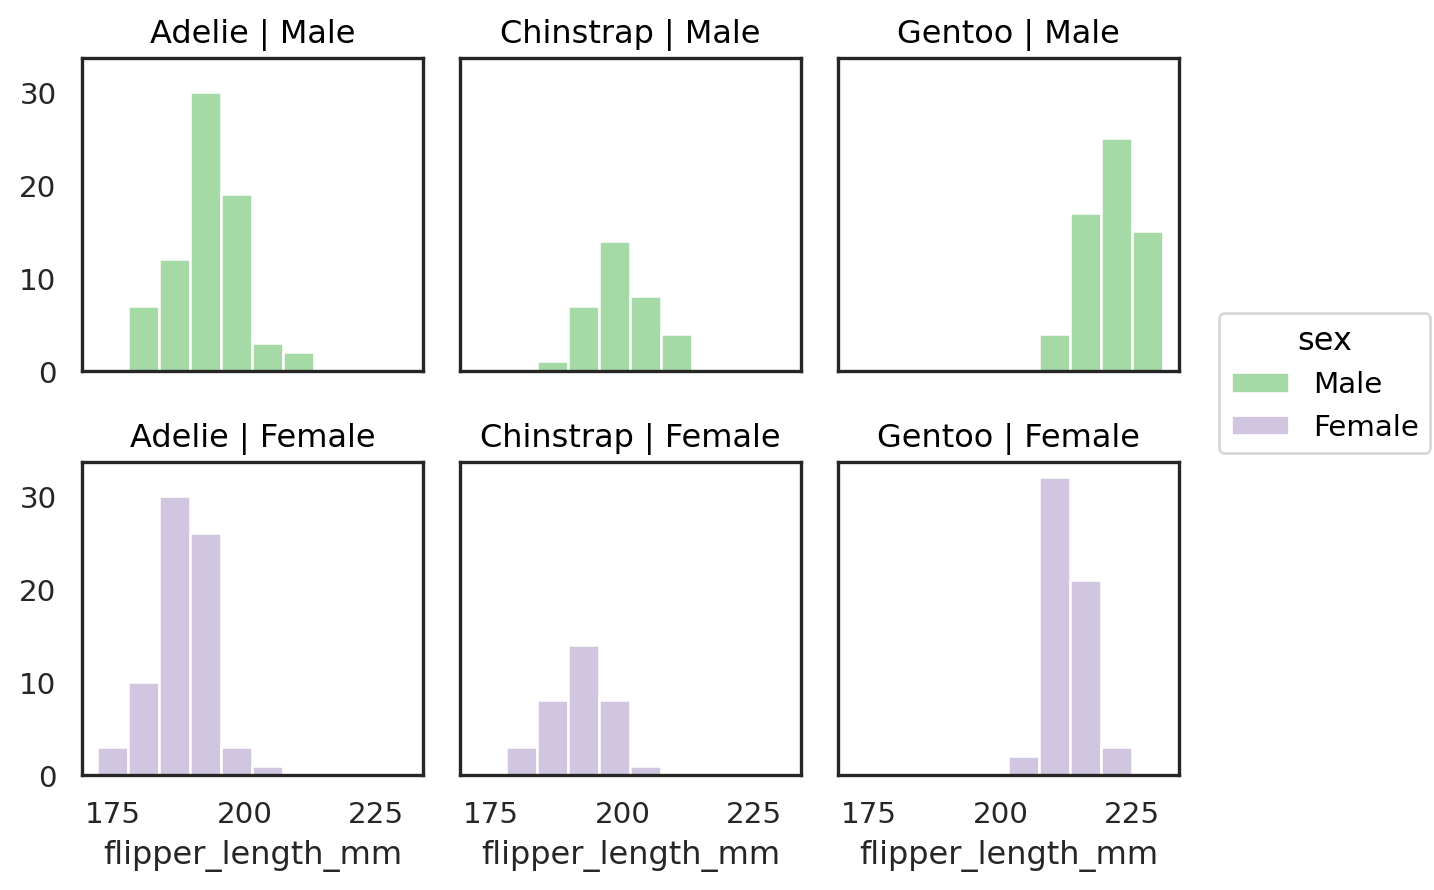

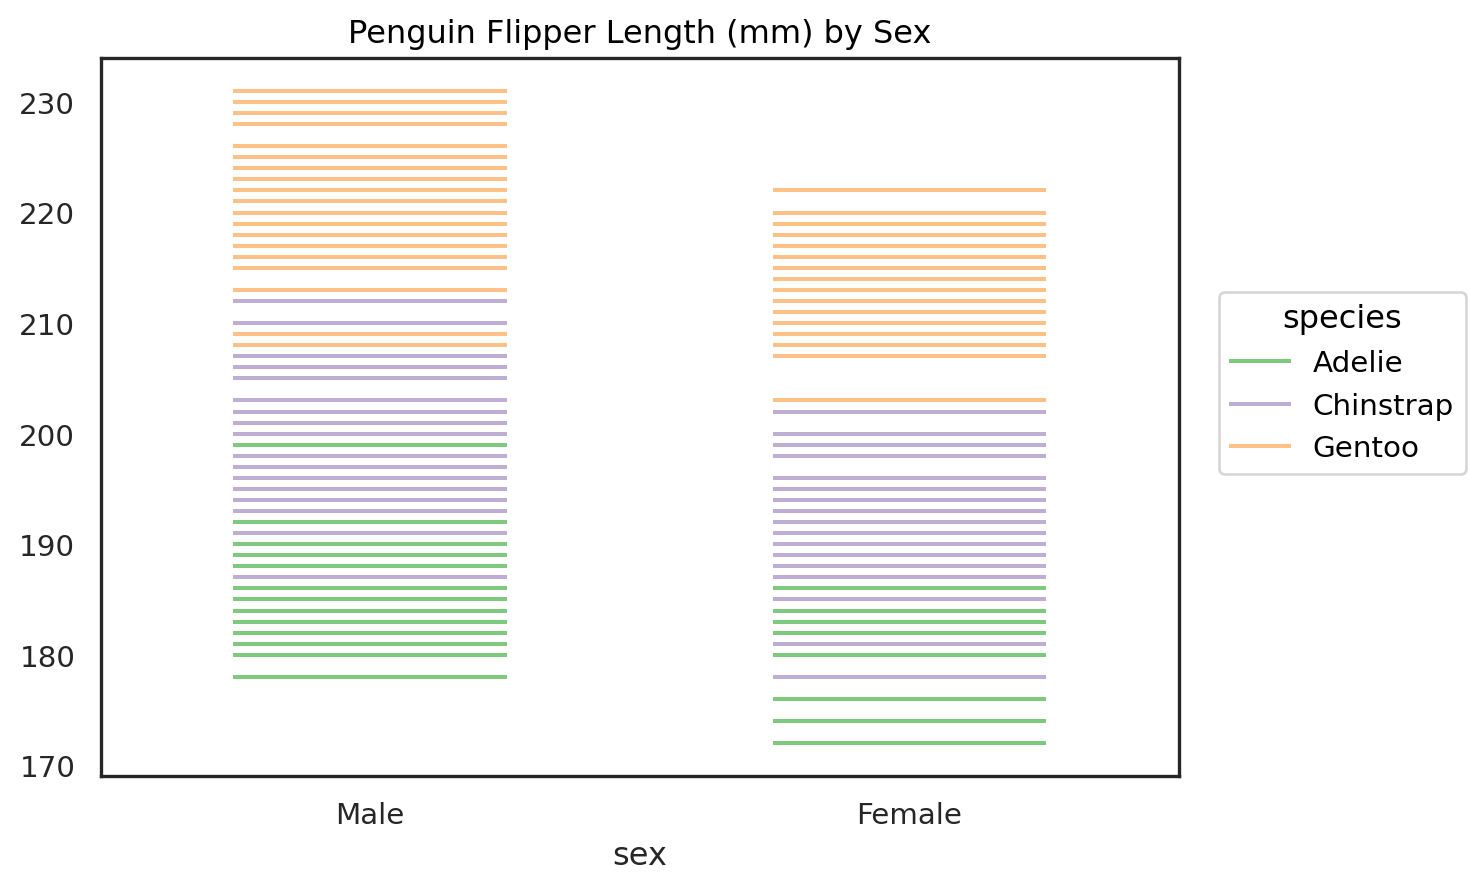

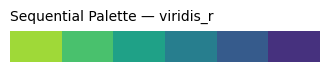

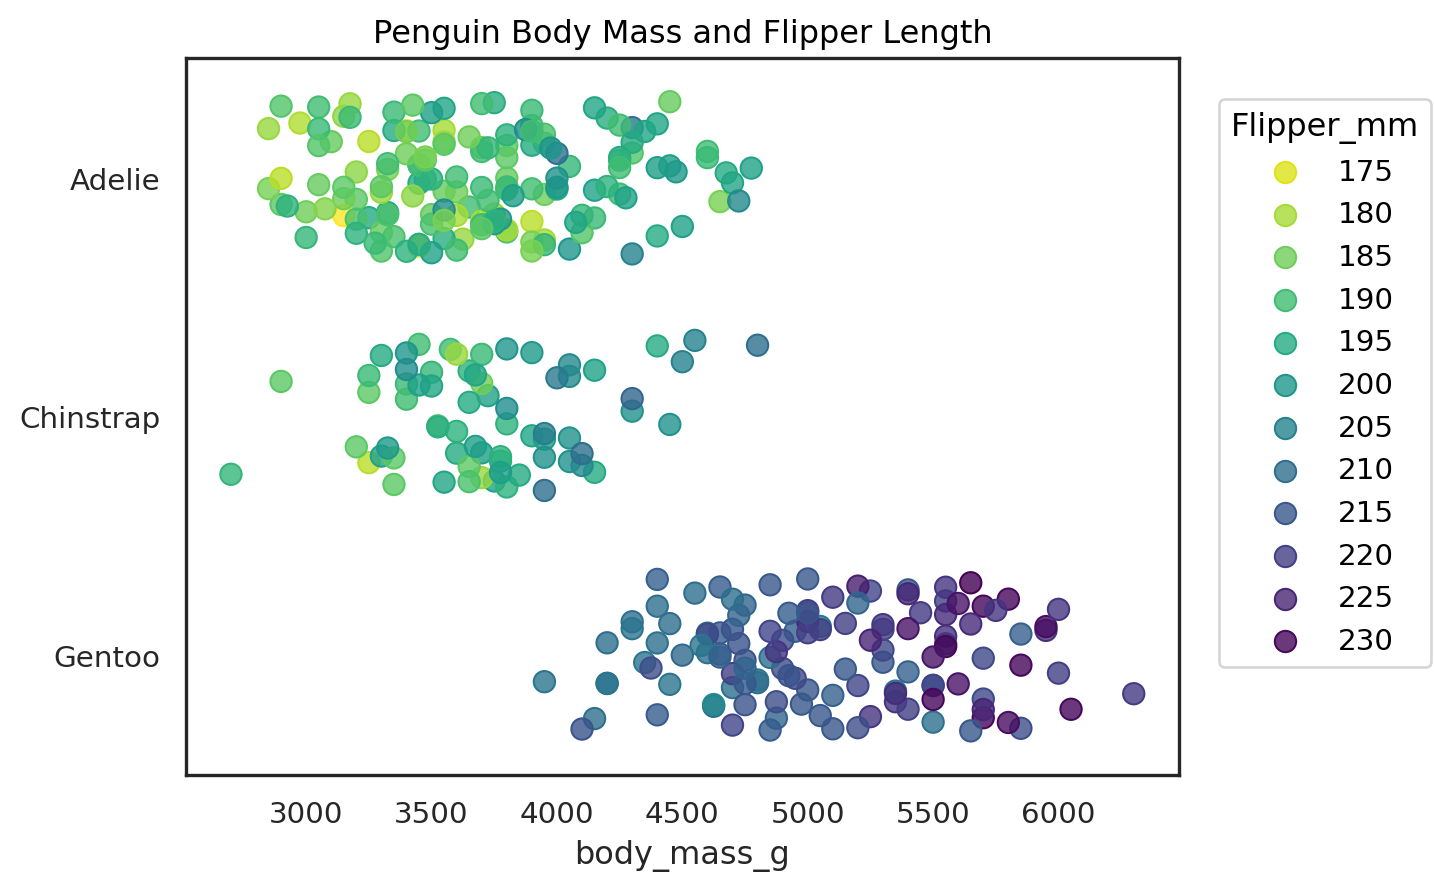

In [16]:
# Load Dataset
penguins = sns.load_dataset('penguins')

# Palettes
theme_palette = 'Accent'
sequential_palette = 'viridis_r'
# theme_palette = sequential_palette # Does not look good

# Plots
plot1 = (
    so.Plot(penguins, x="flipper_length_mm", color='sex')
    .facet(col="species", row="sex")
    .add(so.Bars(), so.Hist())
)

plot2 = (
    so.Plot(penguins, "sex", "flipper_length_mm", color="species")
    .add(so.Dash(width=.5))
    .label(
        title=f'Penguin Flipper Length (mm) by Sex',
        y = "")
)

plot3 = (
    so.Plot(penguins, "body_mass_g", "species", color='flipper_length_mm')
    .add(
        so.Dots(pointsize=8, alpha=1, fillalpha=0.8),
        so.Jitter(.8))
    .scale(
        color=so.Continuous(sequential_palette).tick(every=5))
    .label(
        title=f'Penguin Body Mass and Flipper Length',
        y = "",
        color="Flipper_mm")
)

# Usage:
set_my_global_theme(style='white', palette=theme_palette)
show_palette(theme_palette, 'Theme')
display(plot1)
display(plot2)

show_palette(sequential_palette, 'Sequential')
display(plot3)

<br><a name="id-appendix"></a>
# <b>Appendix</b>

## <b>_Palette Collection_</b>

<div class="markdown-google-sans">
<font size="4">
Palette collection from around the internet, classified by type and source.
</font>
</div>

<br>

<div class="markdown-google-sans">
<font size="4">
Modify the code under 'Usage' to see the full collection:
</font>
</div>

Matplotlib Diverging


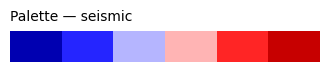

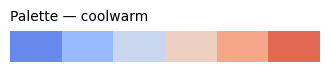

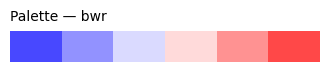

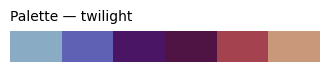

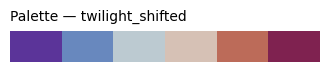

In [11]:
# Categorical palettes: For categorical data with equal emphasis across categories.
# Best when you need distinct colours for unordered groups.
cat_palettes = {
    'Matplotlib Base': ['tab10', 'tab20', 'tab20c', 'tab20b'],
    'Seaborn Variations': ['dark', 'bright', 'colorblind', 'deep', 'muted', 'pastel'],
    'Circular Colour Systems': ['hls', 'husl'],  # Make n colours: sns.color_palette('husl', n)
    'ColorBrewer Categorical': [ 'Set1', 'Dark2', 'Paired', 'Accent', 'Set2', 'Set3', 'Pastel1', 'Pastel2']
}

# Sequential palettes: For ordered numeric data ranging from low to high values.
# Ideal for continuous variables, intensities, or probabilities.
seq_palettes = {
    'Perceptually Uniform': [
    'inferno', 'plasma', 'magma', 'rocket', 'flare', 'viridis', 'mako', 'crest', 'cividis'
    ],
    'ColorBrewer Single Hue': [  # Vary intensity within one colour
        'Reds', 'Oranges', 'Greens', 'Blues', 'Purples', 'Greys'
    ],
    'ColorBrewer Multi Hue': [  # Multi-color gradients for enhanced range perception
        'YlOrBr', 'YlOrRd', 'OrRd', 'YlGn', 'YlGnBu', 'BuGn', 'GnBu', 'PuBuGn',
        'PuBu', 'BuPu', 'PuRd', 'RdPu'
    ]
}

# Diverging palettes: For numeric data with a meaningful centre point or zero value.
# Emphasises extremes relative to a central value.
div_palettes = {
    'Perceptually Uniform': ['icefire', 'vlag'],  # Blue/red at poles ("cold" and "hot"), reversible
    'Matplotlib Diverging': ['seismic', 'coolwarm', 'bwr', 'twilight', 'twilight_shifted'],
    'ColorBrewer Diverging': [  # Reversible (e.g., "BrBG_r")
        'PiYG', 'PRGn', 'RdYlGn', 'Spectral', 'RdBu',  'RdYlBu', 'RdGy', 'PuOr', 'BrBG'
    ]
}

def show_palettes(palettes_dict, category=None):
    categories = [category] if category and category in palettes_dict else palettes_dict

    for cat in categories:
        print(cat)
        for palette in palettes_dict[cat]:
            show_palette(palette, as_cmap=False)


# Usage
# show_palettes(cat_palettes)  # print all palettes
show_palettes(div_palettes, category='Matplotlib Diverging') # print one category

## <b>_Explore Datasets_</b>

In [12]:
import pandas as pd
import seaborn as sns
# from ydata_profiling import ProfileReport


def print_seaborn_dataset_info(dataset_names: list[str]) -> None:
    for dataset in dataset_names:
        if dataset == "brain_networks":
            continue

        df = sns.load_dataset(dataset)
        separator = "-" * 50
        print(f"\n\nDATASET NAME: {dataset}\n{separator}")
        print(df.info())

# def generate_profile_report(df: pd.DataFrame, report_name: str) -> None:

#     report = ProfileReport(df, title=f"{report_name} Profile Report")
#     output_file = f"{report_name}.html"
#     report.to_file(output_file)
#     print(f'Report saved as: "{output_file}"')


# Usage:

## Single Seaborn Dataset (simple profile)
print_seaborn_dataset_info(['diamonds'])

## All Seaborn Datasets
# print_seaborn_dataset_info(sns.get_dataset_names())

## Data Profile of DataFrame (visual html)
# generate_profile_report(sns.load_dataset('tips'), 'Seaborn - Tips')



DATASET NAME: diamonds
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None


<br>

---